In [2]:
%cd /nfsd/sysbiobig/bazzaccoen/tangramlit_dev

/nfsd/sysbiobig/bazzaccoen/tangramlit_dev


In [3]:
import tangramlit as tgl

/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/myvenv/lib64/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/myvenv/lib64/python3.12/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/myvenv/lib64/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text 

In [5]:
import scanpy as sc
import numpy as np 
import pandas as pd
# import anndata as ad
import yaml

# Data preparation

In [6]:
# Set data path
data_path = "/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/data/Dataset8/"

## SC data


In [5]:
# read counts
from scipy import io

X = io.mmread(data_path + "sc_data_files/matrix.mtx.gz").T.tocsr()
X.shape

(176584, 31053)

In [6]:
# read IDs
genes = pd.read_csv(data_path + "sc_data_files/features.tsv.gz", sep="\t", header=None)
genes.columns = ["gene_id", "gene_name", "feature_type"]

barcodes = pd.read_csv(data_path + "sc_data_files/barcode.tsv", sep=",", header=0, index_col=0)  # comma separated!
barcodes.columns = ["barcode"]


In [7]:
# create minimal anndata
adata_sc = sc.AnnData(X)
adata_sc.var["gene_id"] = genes["gene_id"].values
adata_sc.var_names = genes["gene_name"].values
adata_sc.obs_names = barcodes["barcode"]
adata_sc


AnnData object with n_obs × n_vars = 176584 × 31053
    var: 'gene_id'

In [8]:
# Cell metadata
meta = pd.read_csv(data_path + "sc_data_files/sample_metadata.csv", index_col=0)

# QC metrics
qc = pd.read_csv(data_path + "sc_data_files/QC.csv", index_col=0)

# Cluster membership
membership = pd.read_csv(data_path + "sc_data_files/cluster.membership.csv", index_col=0)

# Cluster map
annot = pd.read_csv(data_path + "sc_data_files/cluster.annotation.csv", index_col=0)


In [8]:
meta.head()  # not necessary

,aggr_num,umi.counts,gene.counts,library_id,tube_barcode,Seq_batch,Region,Lib_type,Gender,Donor,...,Live_percent,Total_Cells,Live_Cells,method,exp_component_name,mapped_reads,unmapped_reads,nonconf_mapped_reads,total.reads,doublet.score
AAACCCAAGCTTCATG-1L8TX_181211_01_G12,1,55812,7122,L8TX_181211_01_G12,SM-HH8FP-1,RTX-841,MOp,Cells_FACS-tdT,Male,426003,...,75%,7882,5898,10xv3,AAACCCAAGCTTCATG-1L8TX_181211_01_G12,141238,2460,11355,155053.0,0.154639
AAACCCAAGGCGCTTC-1L8TX_181211_01_G12,1,1670,668,L8TX_181211_01_G12,SM-HH8FP-1,RTX-841,MOp,Cells_FACS-tdT,Male,426003,...,75%,7882,5898,10xv3,AAACCCAAGGCGCTTC-1L8TX_181211_01_G12,4160,64,1049,5273.0,0.030928
AAACCCAAGGCTTAAA-1L8TX_181211_01_G12,1,1873,406,L8TX_181211_01_G12,SM-HH8FP-1,RTX-841,MOp,Cells_FACS-tdT,Male,426003,...,75%,7882,5898,10xv3,AAACCCAAGGCTTAAA-1L8TX_181211_01_G12,6404,47,2539,8990.0,0.000000
AAACCCAAGTGAGGTC-1L8TX_181211_01_G12,1,36622,6125,L8TX_181211_01_G12,SM-HH8FP-1,RTX-841,MOp,Cells_FACS-tdT,Male,426003,...,75%,7882,5898,10xv3,AAACCCAAGTGAGGTC-1L8TX_181211_01_G12,90968,1351,7997,100316.0,0.163265
AAACCCACACCAGCCA-1L8TX_181211_01_G12,1,90475,8322,L8TX_181211_01_G12,SM-HH8FP-1,RTX-841,MOp,Cells_FACS-tdT,Male,426003,...,75%,7882,5898,10xv3,AAACCCACACCAGCCA-1L8TX_181211_01_G12,240181,4107,20590,264878.0,0.164948


In [9]:
qc.head()  # not necessary

,x
1,AAACCCAAGCTTCATG-1L8TX_181211_01_G12
2,AAACCCAAGTGAGGTC-1L8TX_181211_01_G12
3,AAACCCACACCAGCCA-1L8TX_181211_01_G12
4,AAACCCAGTGAACGGT-1L8TX_181211_01_G12
5,AAACCCAGTGGCATCC-1L8TX_181211_01_G12


In [10]:
membership

,x
AAACCCAAGCTTCATG-1L8TX_181211_01_G12,42
AAACCCAAGTGAGGTC-1L8TX_181211_01_G12,41
AAACCCACACCAGCCA-1L8TX_181211_01_G12,42
AAACCCAGTGAACGGT-1L8TX_181211_01_G12,41
AAACCCAGTGGCATCC-1L8TX_181211_01_G12,20
...,...
TTTGTTGTCAGCATTG-12L8TX_190430_01_G08,40
TTTGTTGTCATTGCGA-12L8TX_190430_01_G08,41
TTTGTTGTCCCAACTC-12L8TX_190430_01_G08,43
TTTGTTGTCTATGCCC-12L8TX_190430_01_G08,42


In [11]:
annot

,cluster_label,subclass_label,class_label,cluster_color,size
cluster_id,,,,,
1,Lamp5 Pax6,Lamp5,GABAergic,#DDACC9,81
2,Lamp5 Egln3_2_1,Lamp5,GABAergic,#DD8091,179
3,Lamp5 Pdlim5_1,Lamp5,GABAergic,#FF829E,247
4,Lamp5 Pdlim5_2,Lamp5,GABAergic,#FF7290,537
5,Lamp5 Slc35d3_1,Lamp5,GABAergic,#FFA388,1275
...,...,...,...,...,...
143,L6b Shisa6_low_1,Low Quality,Low Quality,#5A7A65,84
144,L6b Shisa6_low_2,Low Quality,Low Quality,#1F7C70,95
145,Oligo Opalin_neuon,doublet,Low Quality,#41775C,16


Metadata and QC data are not required, cluser membership and annotation are required, but cover only a subset of cells, thus some will have `nan`.

In [9]:
# merge membership with annotation
merged = membership.merge(annot, left_on="x", right_index=True, how="left")

# add into adata.obs
adata_sc.obs = adata_sc.obs.join(merged, how="left")
adata_sc.obs.head()


,x,cluster_label,subclass_label,class_label,cluster_color,size
barcode,,,,,,
AAACCCAAGCTTCATG-1L8TX_181211_01_G12,42.0,L5 IT Tcap_2,L5 IT,Glutamatergic,#52CA74,17334.0
AAACCCAAGGCGCTTC-1L8TX_181211_01_G12,NaN,NaN,NaN,NaN,NaN,NaN
AAACCCAAGGCTTAAA-1L8TX_181211_01_G12,NaN,NaN,NaN,NaN,NaN,NaN
AAACCCAAGTGAGGTC-1L8TX_181211_01_G12,41.0,L5 IT Tcap_1,L5 IT,Glutamatergic,#5DDB65,7462.0
AAACCCACACCAGCCA-1L8TX_181211_01_G12,42.0,L5 IT Tcap_2,L5 IT,Glutamatergic,#52CA74,17334.0


Since the full Tangram model requires sc annotations, we remove all cells with a missing value:

In [10]:
adata_sc = adata_sc[adata_sc.obs['x'].notna()]
adata_sc

View of AnnData object with n_obs × n_vars = 94170 × 31053
    obs: 'x', 'cluster_label', 'subclass_label', 'class_label', 'cluster_color', 'size'
    var: 'gene_id'

Shape does not match the $7240 \times 25186$ of the benchmarking...

In [ ]:
sc.write(filename=data_path + "scRNA_data.h5ad", adata=adata_sc, ext='h5ad')

## MERFISH data
Full spatial data (counts and metadata) are availabel in the unzipped `merfish-updated.h5ad.gz`. Only steps necessary to align to the benchmarking set is to subset on ‘mouse1_slice162’ and create the `obsm['spatial']` field.

In [7]:
adata_st = sc.read_h5ad(data_path + "merfish-updated.h5ad")
adata_st


/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/myvenv/lib64/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 280327 × 254
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id'
    var: 'n_iso'
    layers: 'X', 'log1p', 'norm'

In [5]:
adata_st.obs['slice_id'].value_counts()

slice_id
mouse1_slice153    7656
mouse1_slice162    6963
mouse1_slice102    6731
mouse1_slice212    6535
mouse1_slice170    6459
                   ... 
mouse2_slice31     2037
mouse1_slice21     2033
mouse2_slice1      1706
mouse2_slice10     1160
mouse2_slice20      670
Name: count, Length: 64, dtype: int64

In [8]:
adata_st = adata_st[adata_st.obs['slice_id'] == 'mouse1_slice162']
adata_st.obsm['spatial'] = adata_st.obs[['center_x', 'center_y']].to_numpy()
adata_st

/tmp/ipykernel_2835956/127073224.py:2: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata_st.obsm['spatial'] = adata_st.obs[['center_x', 'center_y']].to_numpy()


AnnData object with n_obs × n_vars = 6963 × 254
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id'
    var: 'n_iso'
    obsm: 'spatial'
    layers: 'X', 'log1p', 'norm'

Final data shape matches the benchmarking paper exactly.

In [ ]:
sc.write(filename=data_path + 'MERFISH_data.h5ad', adata=adata_st, ext='h5ad')

/tmp/ipykernel_2835956/1282539223.py:1: FutureWarning: The specified parameters ('ext',) are no longer positional. Please specify them like `ext='h5ad'`
  sc.write(data_path + 'MERFISH_data.h5ad', adata_st, 'h5ad')


# Data Loading

In [7]:
adata_sc = sc.read_h5ad(data_path + "scRNA_data.h5ad")
adata_sc

AnnData object with n_obs × n_vars = 94170 × 31053
    obs: 'x', 'cluster_label', 'subclass_label', 'class_label', 'cluster_color', 'size'
    var: 'gene_id'

In [8]:
adata_st = sc.read(data_path + "MERFISH_data.h5ad") 
adata_st

AnnData object with n_obs × n_vars = 6963 × 254
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id'
    var: 'n_iso'
    obsm: 'spatial'
    layers: 'X', 'log1p', 'norm'

#### CT Annotations

In [9]:
print("scRNA cell types: \n", adata_sc.obs['subclass_label'].unique())
print("Spatial data cell types: \n", adata_st.obs['subclass'].unique())
common_cts = set(adata_sc.obs['subclass_label'].unique()) & set(adata_st.obs['subclass'].unique())
print(f"Common cell types: \n {common_cts} \n Length: {len(common_cts)}")

scRNA cell types: 
 ['L5 IT', 'Vip', 'Low Quality', 'L6 IT', 'L6 CT', ..., 'Sncg', 'L5 ET', 'L6 IT Car3', 'SMC', 'Pvalb']
Length: 22
Categories (22, object): ['Astro', 'Endo', 'L2/3 IT', 'L5 ET', ..., 'Sst', 'VLMC', 'Vip', 'doublet']
Spatial data cell types: 
 ['Microglia', 'L6_IT', 'Astrocytes', 'Oligodendrocytes', 'L23_IT', ..., 'L6b', 'Pericytes', 'Lamp5', 'Sncg', 'Sst_Chodl']
Length: 25
Categories (25, object): ['Astrocytes', 'Endothelial', 'L5_IT', 'L5_PT', ..., 'Sst_Chodl', 'VLMC', 'Vip', 'other']
Common cell types: 
 {'Lamp5', 'L6b', 'Pvalb', 'OPC', 'SMC', 'Vip', 'Sncg', 'Sst', 'VLMC'} 
 Length: 9


## Harmonization

In [10]:
adata_sc = adata_sc[adata_sc.obs['subclass_label'].isin(common_cts)]
adata_st = adata_st[adata_st.obs['subclass'].isin(common_cts)]

print(adata_sc.shape)
print(adata_st.shape)

(8674, 31053)
(869, 254)


# Config

In [11]:
# Read config yaml
with open("data/Dataset8/train_config.yaml", "r") as f:
        config = yaml.safe_load(f)

config  # contains rng seed

{'cluster_label': 'subclass_label',
 'lambda_count': 1e-05,
 'lambda_ct_islands': 1,
 'lambda_d': 0.001,
 'lambda_f_reg': 1e-05,
 'lambda_g1': 1,
 'lambda_g2': 1,
 'lambda_geary': 1,
 'lambda_getis_ord': 1,
 'lambda_l1': 1e-16,
 'lambda_l2': 1e-19,
 'lambda_moran': 1,
 'lambda_neighborhood_g1': 1,
 'lambda_r': 1e-10,
 'lambda_sparsity_g1': 1,
 'learning_rate': 0.1,
 'filter': False,
 'num_epochs': 1000,
 'random_state': 42,
 'target_count': None}

In [12]:
# Get shared genes (case-insensitive)
sc_genes = {gene.lower(): gene for gene in adata_sc.var_names}
st_genes = {gene.lower(): gene for gene in adata_st.var_names}

# Find intersection of lowercase gene names
shared_genes_set = set(sc_genes.keys()) & set(st_genes.keys())
shared_genes = [gene_lower for gene_lower in shared_genes_set]

# Shuffle the shared genes
shared_genes = np.array(shared_genes)
np.random.seed(config['random_state'])
np.random.shuffle(shared_genes)

# Split into train and validation
train_ratio = 0.8
n_train = int(len(shared_genes) * train_ratio)
train_genes = shared_genes[:n_train]
val_genes = shared_genes[n_train:]

print(len(train_genes), "training genes: ", train_genes[0:10], "...")
print(len(val_genes), "validation genes: ", val_genes[0:10], "...")

203 training genes:  ['wnt7b' 'tmem163' 'osr1' 'ptprt' 'flt1' 'gfap' 'rab3b' 'pde11a' 'lypd1'
 'cdh12'] ...
51 validation genes:  ['chat' 'trpc4' '5730522e02rik' 'cdcp1' 'syndig1' 'daam2' 'crispld2'
 'adam2' 'rerg' 'cbln2'] ...


In [49]:
val_sp = 1 - (adata_st[:, val_genes].layers['X'] == 0).sum(axis = 0) / 869

In [50]:
val_sp

matrix([[0.08170311, 0.40966628, 0.07134638, 0.12428078, 0.40161105,
         0.48216341, 0.21058688, 0.09666283, 0.3164557 , 0.26006904,
         0.3164557 , 0.32566168, 0.23820483, 0.10011507, 0.36708861,
         0.98849252, 0.56731876, 0.07249712, 0.19332566, 0.09436133,
         0.4867664 , 0.10241657, 0.50517837, 0.4867664 , 0.30149597,
         0.84579977, 0.09896433, 0.19677791, 0.23245109, 0.23475259,
         0.28423475, 0.13808976, 0.13003452, 0.06674338, 0.50747986,
         0.20713464, 0.07364787, 0.50978136, 0.43958573, 0.36823936,
         0.22899885, 0.27157652, 0.11162255, 0.20368239, 0.27502877,
         0.11622555, 0.43383199, 0.10126582, 0.23705409, 0.43843498,
         0.08745685]])

In [39]:
print(adata_st.layers['norm'][0:5,0:5])

[[   0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.        ]
 [   0.            0.          911.73546389    0.         3646.94185555]
 [   0.         1058.31993278    0.            0.         2116.63986556]
 [   0.            0.            0.            0.            0.        ]]


In [47]:
adata_st.raw.X[0:5,0:5]

AttributeError: 'NoneType' object has no attribute 'X'

In [51]:
adata_st.X = adata_st.layers['log1p'] 

# Model training

In [52]:
ad_map, mapper, mapper_data = tgl.map_cells_to_space(
        adata_sc=adata_sc, 
        adata_st=adata_st, 
        train_genes_names=train_genes,
        val_genes_names=val_genes,
        **config,
        )

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name               | Type      | Params | Mode 
---------------------------------------------------------
0 | _density_criterion | KLDivLoss | 0      | train
  | other params       | n/a       | 7.5 M  | n/a  
---------------------------------------------------------
7.5 M     Trainable params
0         Non-trainable params
7.5 M     Total params
30.151    Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode



Validating with 50 genes
S matrix shape: torch.Size([8674, 50])
G matrix shape: torch.Size([869, 50])

Validation 0: {'val_score': 0.49977630376815796, 'val_sparsity-weighted_score': 0.012347702868282795, 'val_AUC': 0.6619328260421753, 'val_entropy': 0.9264290928840637}


Trainig:   0%|          | 0/1000 [00:00<?, ?it/s]


Training with 202 genes
S matrix shape: torch.Size([8674, 202])
G matrix shape: torch.Size([869, 202])


Trainig:   0%|          | 1/1000 [00:03<53:46,  3.23s/it]

Epoch 0: {'loss': -4.169119834899902, 'main_loss': 0.554187536239624, 'vg_reg': 0.4481894075870514, 'kl_reg': 9.723567018227186e-08, 'entropy_reg': -5.438133484858554e-06, 'l1_term': 6.013063935661478e-10, 'l2_term': 7.536750628971134e-13, 'sparsity_term': 0.6688498854637146, 'neighborhood_term': 0.7176793217658997, 'getis_ord_term': 0.7882478833198547, 'moran_term': -0.0018770771566778421, 'geary_term': 0.9938486218452454, 'ct_island_term': 0.0}


Trainig:   5%|▌         | 50/1000 [02:43<49:11,  3.11s/it]


Validation 49: {'val_score': 0.54109787940979, 'val_sparsity-weighted_score': 0.013072344474494457, 'val_AUC': 0.6511340141296387, 'val_entropy': 0.7154785990715027}


Trainig:  10%|█         | 100/1000 [05:17<47:37,  3.17s/it]


Validation 99: {'val_score': 0.5279419422149658, 'val_sparsity-weighted_score': 0.012857116758823395, 'val_AUC': 0.6515864133834839, 'val_entropy': 0.3191814422607422}


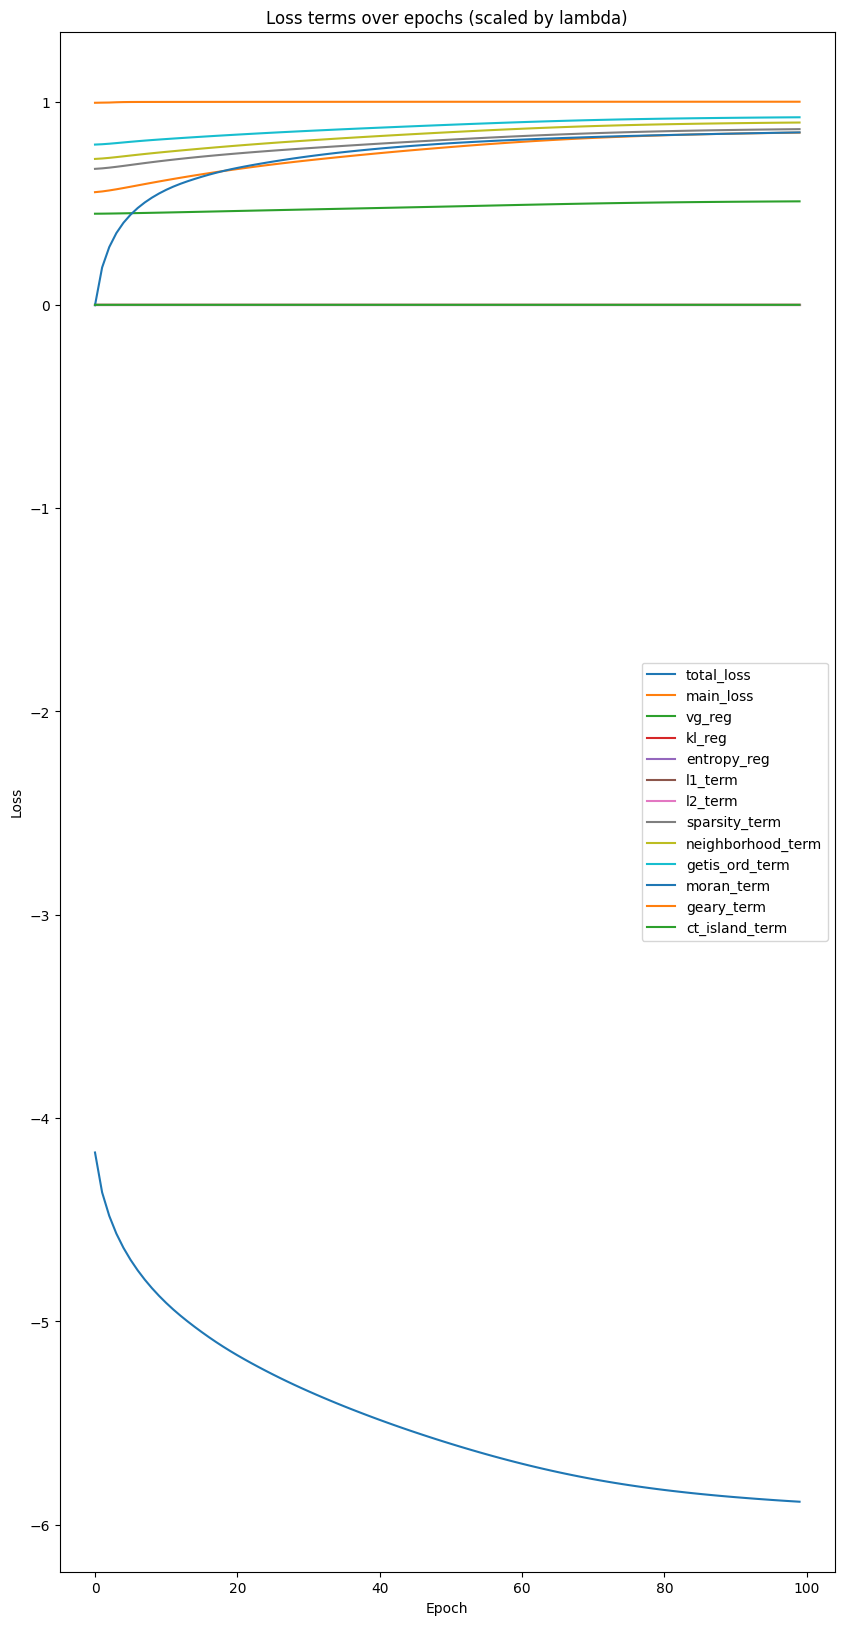

In [53]:
tgl.plot_training_history(adata_map=ad_map, hyperpams=mapper.hparams,
                   log_scale=False, lambda_scale=True)

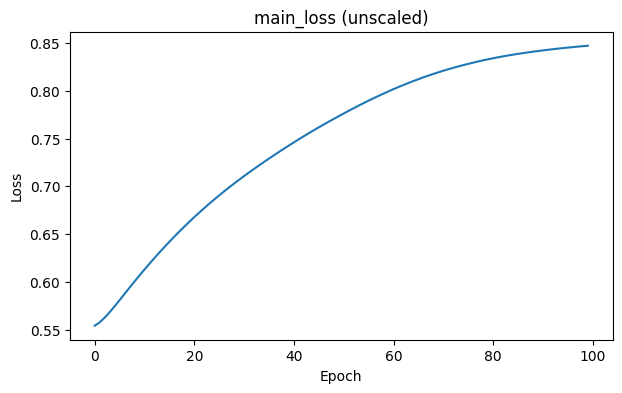

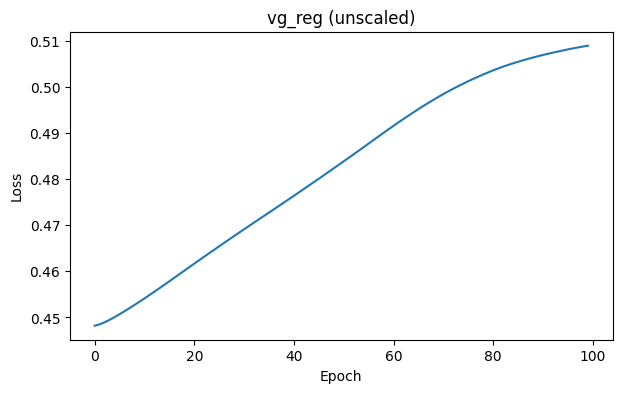

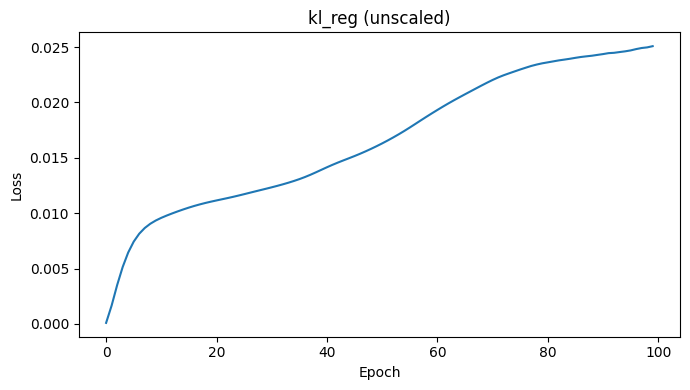

In [54]:
# Plot main loss
tgl.plot_loss_terms(adata_map=ad_map, loss_key=["main_loss", "vg_reg", "kl_reg"], 
                   lambda_coeff = [1, 1, mapper.hparams.lambda_d], lambda_scale=False)

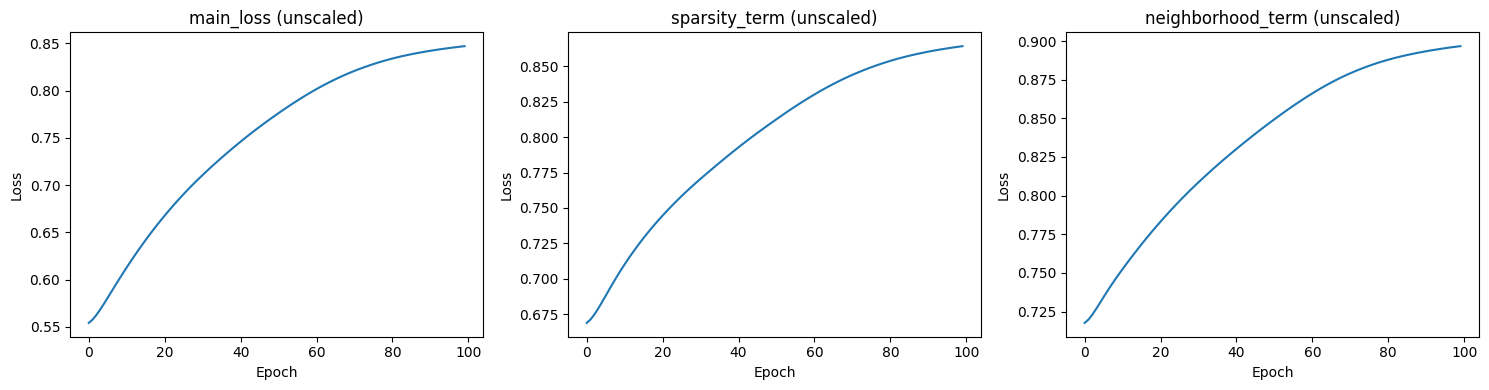

In [55]:
# Score terms
tgl.plot_loss_terms(adata_map=ad_map, loss_key=["main_loss", "sparsity_term", "neighborhood_term"], lambda_scale=False,
                   make_subplot=True, subplot_shape=(1,3))

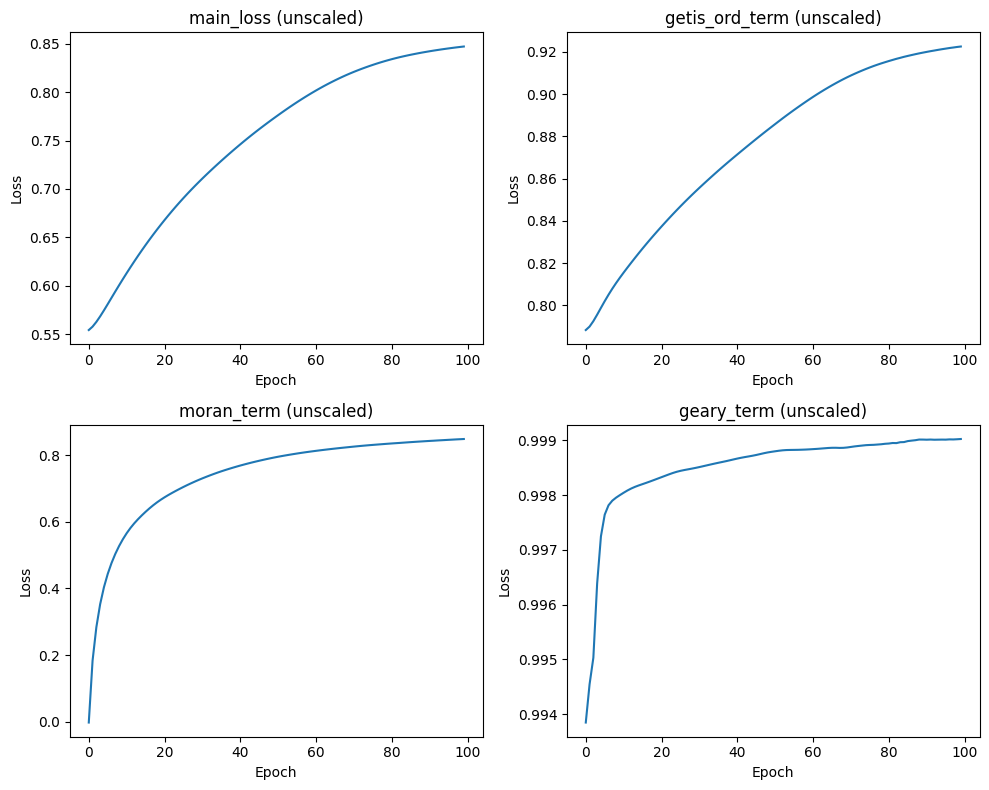

In [56]:
# LISA terms
tgl.plot_loss_terms(adata_map=ad_map, loss_key=["main_loss", "getis_ord_term", "moran_term", "geary_term"], 
                    lambda_scale=False, make_subplot=True)

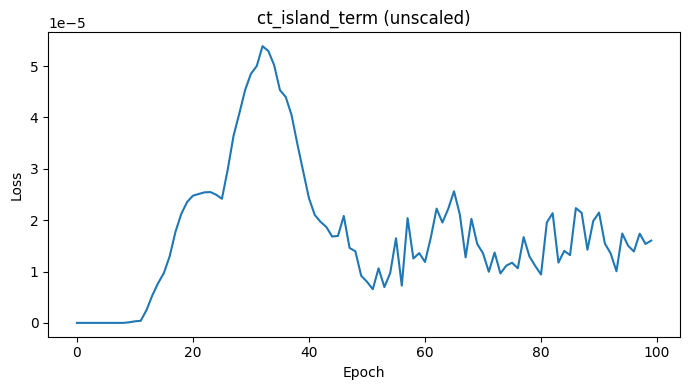

In [57]:
# CT islands term
tgl.plot_loss_terms(adata_map=ad_map, loss_key="ct_island_term", lambda_scale=False)

# Validate

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


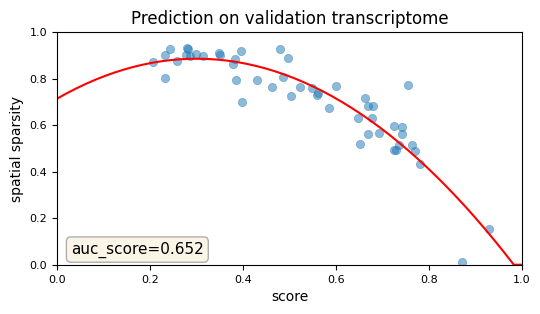

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Validate metric       ┃        DataLoader 0         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           val_AUC           │     0.6515864133834839      │
│           val_JS            │     0.3517836332321167      │
│           val_PCC           │     0.25648054480552673     │
│          val_RMSE           │     1.2113397121429443      │
│          val_SSIM           │     0.17449116706848145     │
│         val_entropy         │     0.3191814422607422      │
│          val_score          │     0.5279419422149658      │
│ val_sparsity-weighted_score │    0.012857116758823395     │
└─────────────────────────────┴─────────────────────────────┘

In [58]:
# call trainer.validate()
full_val = tgl.validate_mapping_experiment(mapper, mapper_data)

# Sparsity

In [59]:
# Project all sc data onto spots
ad_ge = tgl.project_sc_genes_onto_space(ad_map, mapper_data)
ad_ge

AnnData object with n_obs × n_vars = 869 × 31053
    obs: 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'cell_id'
    var: 'gene_id', 'sparsity', 'is_training'
    uns: 'overlap_genes', 'training_genes'

In [60]:
# Create training genes scores dataframe
df = tgl.compare_spatial_gene_expr(ad_ge, mapper_data)

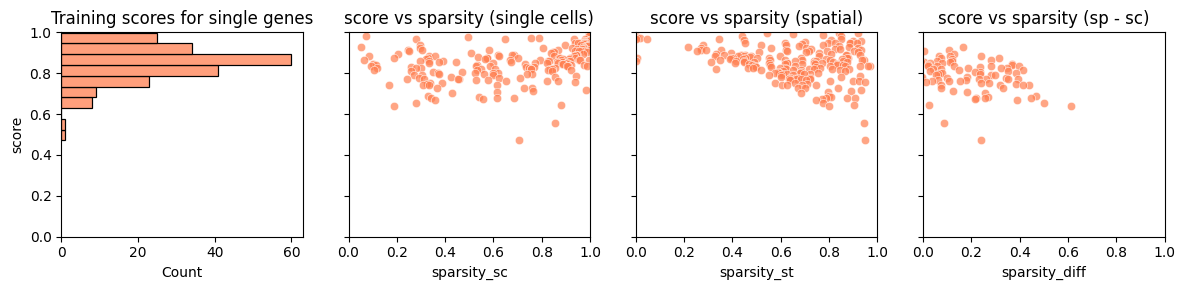

In [61]:
# Plot training scores panels
tgl.plot_training_scores(df)

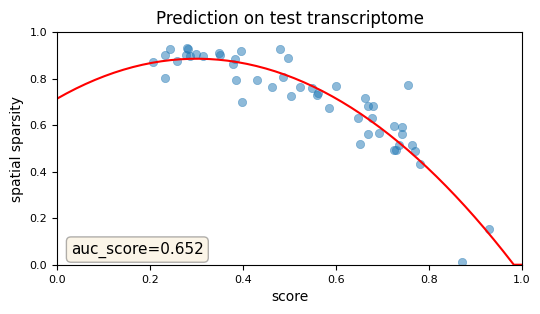

In [62]:
# Plot polyfit on test genes
tgl.plot_auc_curve(df)  # same as validation genes

# Save

In [63]:
# Write tgl.map_cells_to_space() output to .h5ad
sc.write(filename='/nfsd/sysbiobig/bazzaccoen/tangramlit_dev/results/adata_map_Dataset8', adata=ad_map, ext='h5ad')